In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import ElementNotInteractableException
from selenium.webdriver.common.action_chains import ActionChains  #동작을 하나로 묶기
from bs4 import BeautifulSoup
import math
import random
import requests
import json
import pandas as pd
import googlemaps
import numpy as np
import folium
import matplotlib.pyplot as plt
import koreanize_matplotlib
import urllib.request
import datetime
import time
from branca.colormap import LinearColormap
import pymysql
import pandas
import re
from glob import glob
import mysql.connector
import pandas as pd

from haversine import haversine


import mysql.connector
import pandas as pd
import chardet

/tmp/ipykernel_8105/701559827.py:15: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
options = webdriver.ChromeOptions()

prefs = {'download.default_directory' : '../data/eda_project',
         'download.prompt_for_download' : False}

options.add_experimental_option('prefs' , prefs)

url = "https://www.stcis.go.kr/wps/main.do"
driver = webdriver.Chrome(service=Service("/home/min/dev_ws/EDA/driver/chromedriver"), #드라이버 경로는 절대경로로
                          options=options)

driver.get(url)

In [23]:
tab= driver.find_element(By.CLASS_NAME,"tab_menu")
tab_click = tab.find_element(By.XPATH, './/a[contains(@href, "javascript:onclick")]')
tab_click.click() 
 

지역별 분석

In [24]:
menu_list=driver.find_element(By.CLASS_NAME,"menu_list")
reg_anl = menu_list.find_element(By.XPATH, './/a[contains(@rel, "menu1")]')
reg_anl.click() 

주제별 분석

In [25]:
menu_list=driver.find_element(By.CLASS_NAME,"menu_list")
subj_anl = menu_list.find_element(By.XPATH, './/a[contains(@rel, "menu2")]')
subj_anl.click() 

지표별 데이터 검색

In [26]:
menu_cate=driver.find_element(By.ID,"menu2")
sub_menu_list=menu_cate.find_elements(By.TAG_NAME,'a')


주제별 분석의 5가지 지표 TAB 클릭 기능

In [27]:
menu_list=driver.find_element(By.CLASS_NAME,"menu_list")
subj_anl = menu_list.find_element(By.XPATH, './/a[contains(@rel, "menu2")]')
subj_anl.click() 

for idx in range(0,len(sub_menu_list)):
    menu_cate=driver.find_element(By.ID,"menu2")
    sub_menu_list=menu_cate.find_elements(By.TAG_NAME,'a')
    sub_menu_list[idx].click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, "menu2")))

이용량 지표 - 수단 통행량 (2023년 기준) ->나는 인천내에서의 정보는 필요없기 때문에 pass
  
![Screenshot from 2024-03-20 15-31-37.png](<attachment:Screenshot from 2024-03-20 15-31-37.png>)
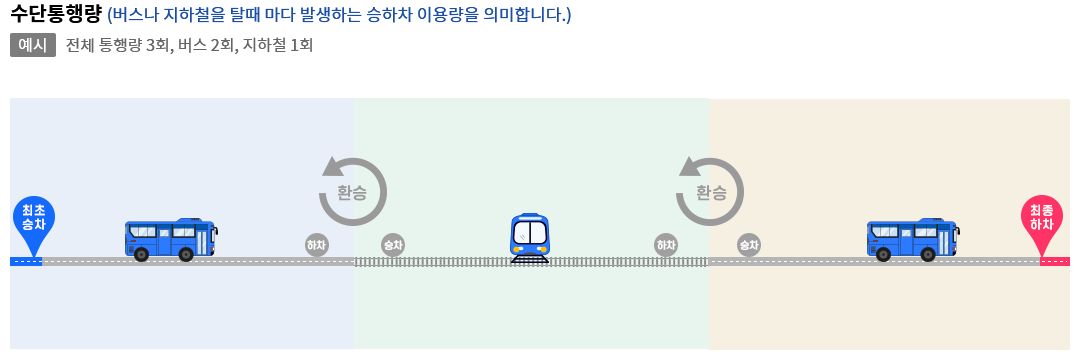

In [64]:
for idx in range(1,4):
    usage_tab_click = driver.find_element(By.XPATH, f"//li[@cdkey='IC010{idx}']")
    usage_tab_click.click()
    time.sleep(1)



필요한것 일반 버스,도시철도 이용 O/D->요한님이 하신다니....ㅎㅎㅎ

서울 생활이동 인구 확인   
서울안에서 이동하거나 외부에서 서울로 오고 간 인구  
ex. 통근,통학,쇼핑,여가

In [6]:
file_list=glob('../../data/eda_project/생활이동_자치구_202402/*')     


In [7]:
len(file_list)

24

In [8]:
s_mv_pop=pd.read_csv("../../data/eda_project/생활이동_자치구_202402/생활이동_자치구_2024.02_06시.csv",encoding='cp949', index_col=0)

In [9]:
s_mv_pop=[]
for each_file in file_list:
    raw_data=pd.read_csv(each_file,encoding='euc-kr')
    s_mv_pop.append(raw_data)

In [10]:
s_mv_pop_total = pd.concat(s_mv_pop)

In [11]:
s_mv_pop_total

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202402,일,10,11010,11010,F,0,EE,15,224.04
1,202402,일,10,11010,11010,F,0,EH,3,28.24
2,202402,일,10,11010,11010,F,0,HE,30,445.20
3,202402,일,10,11010,11010,F,0,HW,6,27.90
4,202402,일,10,11010,11010,F,0,WH,17,27.44
...,...,...,...,...,...,...,...,...,...,...
331623,202402,토,4,39000,11220,M,50,EH,1310,3.33
331624,202402,토,4,39000,11230,M,25,EE,441,*
331625,202402,토,4,39000,11230,M,35,EE,1098,*
331626,202402,토,4,39000,11240,M,40,EH,876,*


In [12]:
s_mv_pop_total['출발 시군구 코드'].unique()

array([11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090,
       11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180,
       11190, 11200, 11210, 11220, 11230, 11240, 11250, 21000, 22000,
       23010, 23020, 23030, 23040, 23050, 23060, 23070, 23080, 23310,
       23320, 24000, 25000, 26000, 29000, 31011, 31012, 31013, 31014,
       31021, 31022, 31023, 31030, 31041, 31042, 31050, 31060, 31070,
       31080, 31091, 31092, 31101, 31103, 31104, 31110, 31120, 31130,
       31140, 31150, 31160, 31170, 31180, 31191, 31192, 31193, 31200,
       31210, 31220, 31230, 31240, 31250, 31260, 31270, 31280, 31350,
       31370, 31380, 32000, 33000, 34000, 35000, 36000, 37000, 38000,
       39000])

이동유형

H : 야간상주지 - 거주지로 추정되는 곳 (당월 기준 특정지역에서 새벽 5시 포함하여 체류한 누적시간이 많은곳)  
W : 주간상주지 - 근무지 또는 학교로 추정되는 곳 (당월기준 새벽 5시 이후부터 체류한 누적시간이 많은곳)  
E : 기타지역 - 야간상주지와 주간상주지가 아닌 지역

In [2]:
sigungu_code = pd.read_excel("../../data/eda_project/서울생활이동데이터_자치구코드_20210907.xlsx")
sigungu_code

,시도,시군구,name,full name
0,11000,11010,종로구,서울특별시 종로구
1,11000,11020,중구,서울특별시 중구
2,11000,11030,용산구,서울특별시 용산구
3,11000,11040,성동구,서울특별시 성동구
4,11000,11050,광진구,서울특별시 광진구
...,...,...,...,...
86,35000,35000,전라북도,전라북도
87,36000,36000,전라남도,전라남도
88,37000,37000,경상북도,경상북도
89,38000,38000,경상남도,경상남도


In [3]:
sigungu_names = sigungu_code[['시군구', 'full name']]

In [4]:
code_name_mapping = dict(zip(sigungu_code['시군구'], sigungu_code['full name']))

In [17]:
s_mv_pop_total['출발 시군구'] = s_mv_pop_total['출발 시군구 코드'].map(code_name_mapping)
s_mv_pop_total['도착 시군구'] = s_mv_pop_total['도착 시군구 코드'].map(code_name_mapping)

In [34]:
s_mv_pop_total['이동인구(합)'].unique()

array(['251.33', '11.92', '207.59', ..., '1112.78', '1160.51', '466.91'],
      dtype=object)

In [20]:
s_mv_pop_total = s_mv_pop_total[s_mv_pop_total['이동인구(합)'] != '*']
s_mv_pop_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25587032 entries, 0 to 331627
Data columns (total 12 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
 10  출발 시군구       object
 11  도착 시군구       object
dtypes: int64(6), object(6)
memory usage: 2.5+ GB


In [29]:
s_mv_pop_total = s_mv_pop_total[s_mv_pop_total['나이'] != 0]
s_mv_pop_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25277942 entries, 5 to 331627
Data columns (total 12 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
 10  출발 시군구       object
 11  도착 시군구       object
dtypes: int64(6), object(6)
memory usage: 2.4+ GB


In [19]:
s_mv_pop_total.to_csv("서울시 생활인구_202402.csv", index=False)

db업로드

In [31]:
remote = mysql.connector.connect(
    host = 'database-1.c3ieyo8m4v9o.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user =  'eda_team',
    password = '123456',
    database = 'eda_project'
)

In [33]:
cur = remote.cursor()
cur.execute('''CREATE TABLE IF NOT EXISTS seoul_mv_pop (
                대상연월 INTEGER,
                요일 TEXT,
                도착시간 INTEGER,
                출발_시군구_코드 INTEGER,
                도착_시군구_코드 INTEGER,
                성별 TEXT,
                나이 INTEGER,
                이동유형 TEXT,
                평균_이동_시간_분 INTEGER,
                이동인구_합 TEXT,
                출발_시군구 TEXT,
                도착_시군구 TEXT
            )''')

In [ ]:
sql = """insert into seoul_mv_pop values (%s,%s,%s,%s,%s,%s,%s,)""" 

In [32]:
s_mv_pop_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29515787 entries, 0 to 331627
Data columns (total 12 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
 10  출발 시군구       object
 11  도착 시군구       object
dtypes: int64(6), object(6)
memory usage: 2.9+ GB


In [15]:
s_mv_pop_total['출발 시군구'].unique()

array(['서울특별시 종로구', '서울특별시 중구', '서울특별시 용산구', '서울특별시 성동구', '서울특별시 광진구',
       '서울특별시 동대문구', '서울특별시 중랑구', '서울특별시 성북구', '서울특별시 강북구', '서울특별시 도봉구',
       '서울특별시 노원구', '서울특별시 은평구', '서울특별시 서대문구', '서울특별시 마포구', '서울특별시 양천구',
       '서울특별시 강서구', '서울특별시 구로구', '서울특별시 금천구', '서울특별시 영등포구', '서울특별시 동작구',
       '서울특별시 관악구', '서울특별시 서초구', '서울특별시 강남구', '서울특별시 송파구', '서울특별시 강동구',
       '부산광역시', '대구광역시', '인천광역시 중구', '인천광역시 동구', '인천광역시 남구', '인천광역시 연수구',
       '인천광역시 남동구', '인천광역시 부평구', '인천광역시 계양구', '인천광역시 서구', '인천광역시 강화군',
       '인천광역시 옹진군', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도 수원시 장안구',
       '경기도 수원시 권선구', '경기도 수원시 팔달구', '경기도 수원시 영통구', '경기도 성남시 수정구',
       '경기도 성남시 중원구', '경기도 성남시 분당구', '경기도 의정부시', '경기도 안양시 만안구',
       '경기도 안양시 동안구', '경기도 부천시', '경기도 광명시', '경기도 평택시', '경기도 동두천시',
       '경기도 안산시 상록구', '경기도 안산시 단원구', '경기도 고양시 덕양구', '경기도 고양시 일산동구',
       '경기도 고양시 일산서구', '경기도 과천시', '경기도 구리시', '경기도 남양주시', '경기도 오산시',
       '경기도 시흥시', '경기도 군포시', '경기도 의왕시', '경기도 하남시', '경기도 용인시', '경기도 파주시',
       '경기도 이

In [16]:
st_gyeonggi_rows = s_mv_pop_total[s_mv_pop_total['출발 시군구'].str.contains('경기도')]

In [17]:
st_gyeonggi_rows

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),출발 시군구,도착 시군구
138067,202402,일,10,31011,11010,F,15,HE,222,8.22,경기도 수원시 장안구,서울특별시 종로구
138068,202402,일,10,31011,11010,F,20,EE,115,*,경기도 수원시 장안구,서울특별시 종로구
138069,202402,일,10,31011,11010,F,20,HE,129,8.80,경기도 수원시 장안구,서울특별시 종로구
138070,202402,일,10,31011,11010,F,20,HW,56,*,경기도 수원시 장안구,서울특별시 종로구
138071,202402,일,10,31011,11010,F,25,HE,63,4.12,경기도 수원시 장안구,서울특별시 종로구
...,...,...,...,...,...,...,...,...,...,...,...,...
330991,202402,토,4,31380,11250,M,40,WH,27,3.01,경기도 양평군,서울특별시 강동구
330992,202402,토,4,31380,11250,M,45,HE,46,3.18,경기도 양평군,서울특별시 강동구
330993,202402,토,4,31380,11250,M,55,WE,85,3.30,경기도 양평군,서울특별시 강동구
330994,202402,토,4,31380,11250,M,55,WH,91,3.27,경기도 양평군,서울특별시 강동구


In [18]:
st_sum = st_gyeonggi_rows[['출발 시군구','이동인구(합)']]


In [19]:
st_sum = st_sum[st_sum['이동인구(합)'] != '*']
st_sum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5753491 entries, 138067 to 330995
Data columns (total 2 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   출발 시군구   object
 1   이동인구(합)  object
dtypes: object(2)
memory usage: 131.7+ MB


In [20]:

st_sum['출발 시군구'] = st_sum['출발 시군구'].str.replace(r'.{3}구$', '', regex=True)

In [24]:
st_sum['출발 시군구'].unique()

array(['경기도 수원시', '경기도 성남시', '경기도 의정부시', '경기도 안양시', '경기도 부천시', '경기도 광명시',
       '경기도 평택시', '경기도 동두천시', '경기도 안산시', '경기도 고양시', '경기도 고양시 ', '경기도 과천시',
       '경기도 구리시', '경기도 남양주시', '경기도 오산시', '경기도 시흥시', '경기도 군포시', '경기도 의왕시',
       '경기도 하남시', '경기도 용인시', '경기도 파주시', '경기도 이천시', '경기도 안성시', '경기도 김포시',
       '경기도 화성시', '경기도 광주시', '경기도 양주시', '경기도 포천시', '경기도 여주시', '경기도 연천군',
       '경기도 가평군', '경기도 양평군'], dtype=object)

In [25]:
st_sum['이동인구(합)'] = st_sum['이동인구(합)'].astype(float)
st_sum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5753491 entries, 138067 to 330995
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   출발 시군구   object 
 1   이동인구(합)  float64
dtypes: float64(1), object(1)
memory usage: 196.2+ MB


In [26]:
st_sum = pd.pivot_table(st_sum, index='출발 시군구', aggfunc='sum')

In [27]:
start_gg=st_sum.sort_values(by='이동인구(합)', ascending=False)


In [29]:
start_gg.head()

,이동인구(합)
출발 시군구,
경기도 성남시,8500393.30
경기도 남양주시,6109769.10
경기도 하남시,6054105.86
경기도 고양시,5685019.26
경기도 부천시,5494352.31


In [30]:
de_gyeonggi_rows = s_mv_pop_total[s_mv_pop_total['도착 시군구'].str.contains('경기도')]